# Algorithme de regularisation TV

In [1]:
# General import
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataGen
from Codes.display import Display_ker
from Codes.display import Display_im
from Codes.display import Display_epd
from Codes.myfunc import nablah
from Codes.myfunc import convolve
from Codes.simplex import Simplex
# iteration FBstep
from Codes.fbstep import FBS_ker
from Codes.fbstep import Energy

In [2]:
# Data

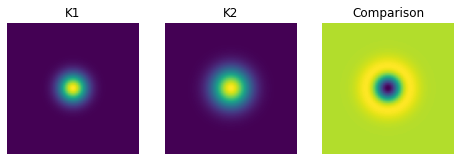

Erreur |K1 - K2|/ |K2| : 0.3500 


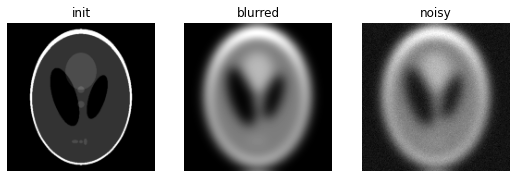

Erreur blurred |x_blurr- x_true|_2 :0.6363
Erreur |x_noisy - x_true|_2 :0.6373


In [3]:
K, K_shift, x_im, x_b, x_o1 = DataGen()

In [9]:
# Algo
#
niter = 2000
alpha = 100
# Matrix sizes
Nx, Ny   = x_im.shape # image size
M,_      = K.shape
M        = M//2
# initialisation
Ki       = K_shift.copy()
px       = np.zeros((Nx,Ny)) 
py       = np.zeros((Nx,Ny))
Etot     = np.zeros(niter)
# Derivation
d      = -np.ones((3,3))
d[1,1] = 8
d_pad  = np.zeros((Nx,Ny))
d_pad[Nx//2-1:Nx//2+2,Ny//2-1:Ny//2+2] = d

In [10]:
count = 0
for n in range(niter):
    # one FBS for kernel
    Ki   = FBS_ker(x_im,Ki,x_o1,d_pad,alpha,simplex=True)
    # energy
    Etot[n],_ = Energy(x_im,Ki,px,py,x_o1,\
                        d_pad,alpha,0)

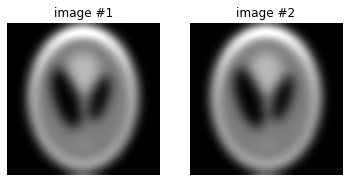

Erreur |im1 - im2|/|im2| :0.0033


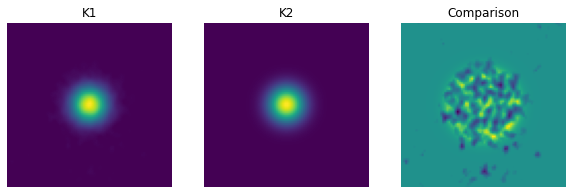

Erreur |K1 - K2|/ |K2| : 0.0256 


In [11]:
Display_im(convolve(x_im,np.pad(Ki, ((Nx//2-M,Nx//2-M),(Ny//2-M,Ny//2-M)), 'constant')),x_b)
Display_ker(K,Ki,mysize=(10,5))

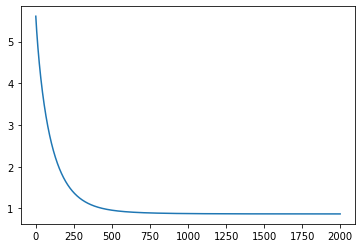

In [12]:
plt.plot(Etot)

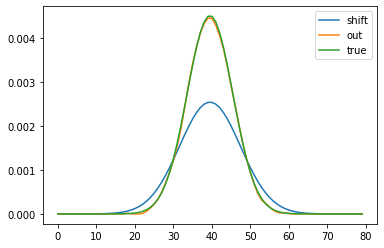

In [13]:
plt.plot(K_shift[40,:],label='shift')
plt.plot(Ki[40,:],label='out')
plt.plot(K[40,:],label='true')
plt.legend()